# Decision Trees 

Let's begin showing a visual example of what a DT wants to do. Example from  Alvaro Fuentes, 'Hands-On Predictive Analytics with Python' provided by Leslie Kerby.

In [1]:
#Import Packages 
from sklearn.datasets import make_blobs #this is a built in dataset from sklearn used for teaching machine learning 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

First we will plot our data to see what exactly we are working with. 

Text(0, 0.5, 'X2')

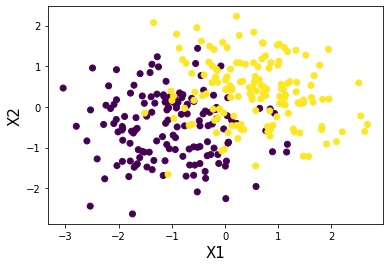

In [2]:
A,b = make_blobs(n_samples=300, n_features=2, cluster_std=0.8, centers=[[-1,-0.5],[0.5,0.5]],shuffle=False,random_state=39)
plt.scatter(A[:,0],A[:,1],c=b)
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15)

You will notice we have two classes (yellow blobs and purple blobs). We want a model that can classify yellow blobs and purple blobs. Using a DT, we just need splits until we can narrow down the data. Let's make the first split a horizontal line down the middle. 

Text(0, 0.5, 'X2')

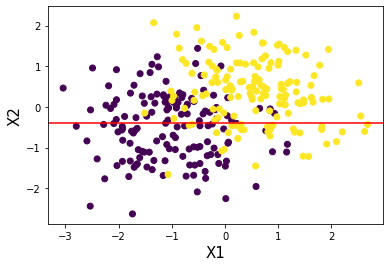

In [3]:
plt.scatter(A[:,0],A[:,1],c=b)
plt.axhline(-0.4,c='red')
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15)

Our first "question" for our tree is if the x point is greater that .4. This does a pretty good job, but there are plenty of different points on each side of the line, lets create another split. This time with a verticle line  

0.46272015572457686

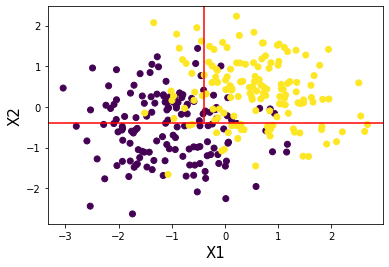

In [4]:
plt.scatter(A[:,0],A[:,1],c=b)
plt.axhline(-0.4,c='red')
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15) #Just copy these four lines from above and add the rest. 
ymax = plt.ylim()[1]
ymin = plt.ylim()[0]
y_data = -0.4
y_transformed = (y_data - ymin) / (ymax - ymin)
plt.axvline(x=-0.4,ymin=y_transformed, c='red')

y_transformed

This is even better, but we could probably make one more split and avoid overfit. Let's add another V. Line 

Text(0, 0.5, 'X2')

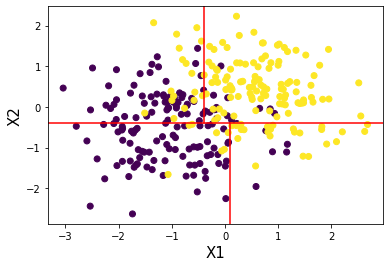

In [5]:
plt.scatter(A[:,0],A[:,1],c=b)
plt.axhline(-0.4,c='red')
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15) #Just copy these four lines from above and add the rest. 
ymax = plt.ylim()[1]
ymin = plt.ylim()[0]
y_data = -0.4
y_transformed = (y_data - ymin) / (ymax - ymin)
plt.axvline(x=-0.4,ymin=y_transformed, c='red')

# Draw bottom vertical line
plt.axvline(x=0.1,ymax=y_transformed, c='red')
plt.xlabel('X1',size=15)
plt.ylabel('X2',size=15)

In theory, we could keep making splits until we correct every sample of data, but then we would have major overfit and our model wouldn't be as effective, remenber we want our models to classify outliers as well. 

# Decision Tree Classification Example 

Now let's train a classification model using Sklearn's decisionTreeClassifier class. We will use the cell phone provider churn dataset. 

In [6]:
churn = pd.read_csv('https://gitlab.com/CEADS/DrKerby/python/raw/master/churn.txt')
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


First thing is first, lets explore the data.

In [7]:
#Let's check missing values 
churn.isnull().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [8]:
churn.shape

(3333, 21)

In [9]:
churn['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

<AxesSubplot:>

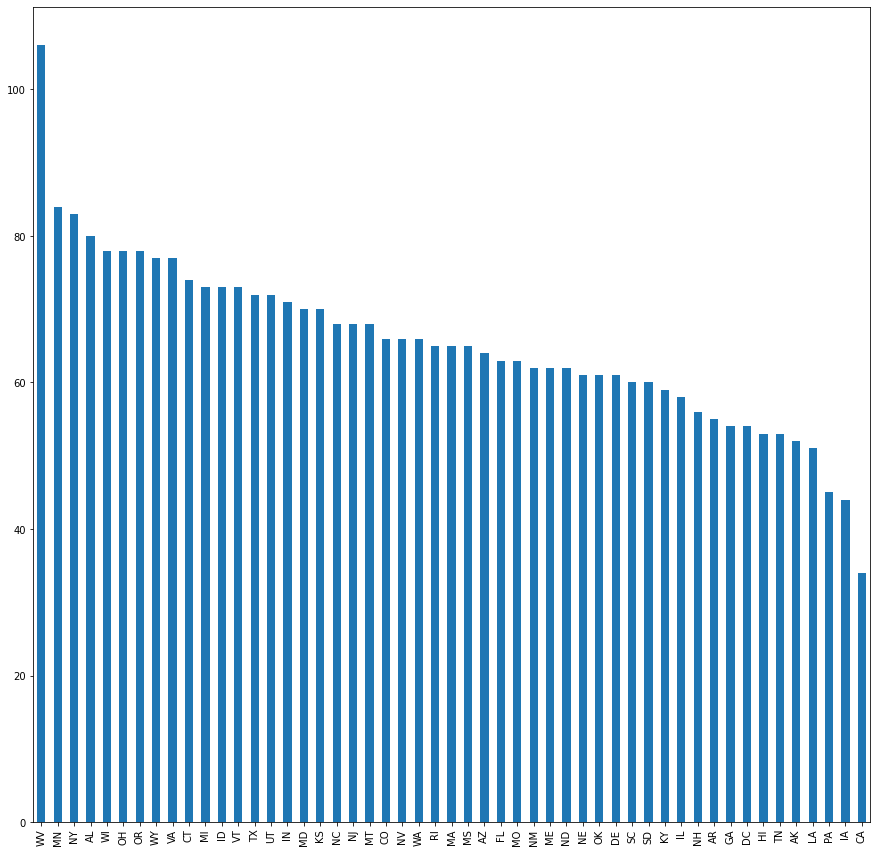

In [10]:
#Let's visualize this data
churn['State'].value_counts().plot.bar(figsize=(15,15))

<AxesSubplot:>

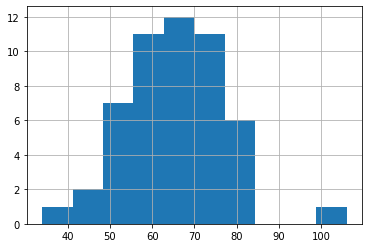

In [11]:
#We create a histogram as well 
churn['State'].value_counts().hist()

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='State', ylabel='Density'>

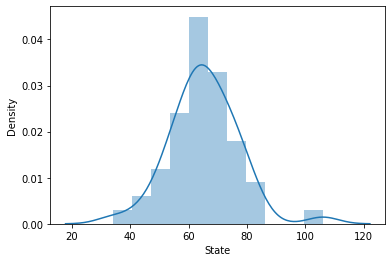

In [15]:
#Seaborn will make this cleaner 
import seaborn as sns
sns.distplot(churn['State'].value_counts())

In [16]:
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
#Let's examine the area code feature 
churn['Area Code'].value_counts()

415    1655
510     840
408     838
Name: Area Code, dtype: int64

In [18]:
#Correlation Matrix 
churn.corr()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


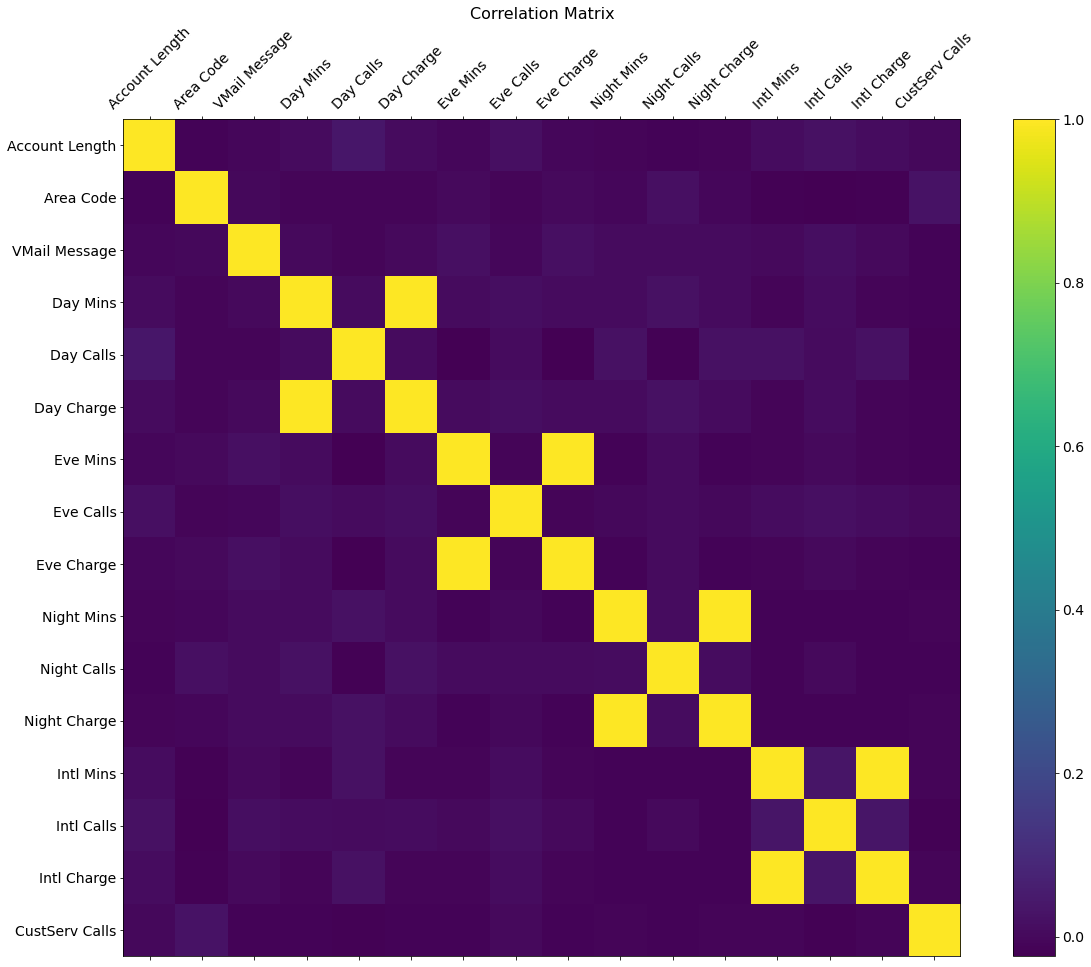

In [20]:
# plt.matshow(churn.corr(),figsize=(10,10))
#Heat map of correlations matrix 
f = plt.figure(figsize=(19, 15))
plt.matshow(churn.corr(), fignum=f.number)
plt.xticks(range(churn.corr().shape[1]), churn.corr().columns, fontsize=14, rotation=45)
plt.yticks(range(churn.corr().shape[1]), churn.corr().columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

plt.show()

Our dataset shows if our customer has "churned" (switched carriers). Let's take a look at the balance of the dataset 

In [23]:
grouped = churn.groupby('Churn?')
grouped.groups
churned= grouped.get_group('True.')
churned.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
10,IN,65,415,329-6603,no,no,0,129.1,137,21.95,...,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True.
15,NY,161,415,351-7269,no,no,0,332.9,67,56.59,...,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True.
21,CO,77,408,393-7984,no,no,0,62.4,89,10.61,...,121,14.44,209.6,64,9.43,5.7,6,1.54,5,True.
33,AZ,12,408,360-1596,no,no,0,249.6,118,42.43,...,119,21.45,280.2,90,12.61,11.8,3,3.19,1,True.
41,MD,135,408,383-6029,yes,yes,41,173.1,85,29.43,...,107,17.33,122.2,78,5.50,14.6,15,3.94,0,True.


In [24]:
churned.shape

(483, 21)

In [25]:
#So we have 483 customers that have churned 
churned.shape[0]/churn.shape[0]

0.14491449144914492

Our dataset is imbalanced. That might be an issue later on. 

<AxesSubplot:>

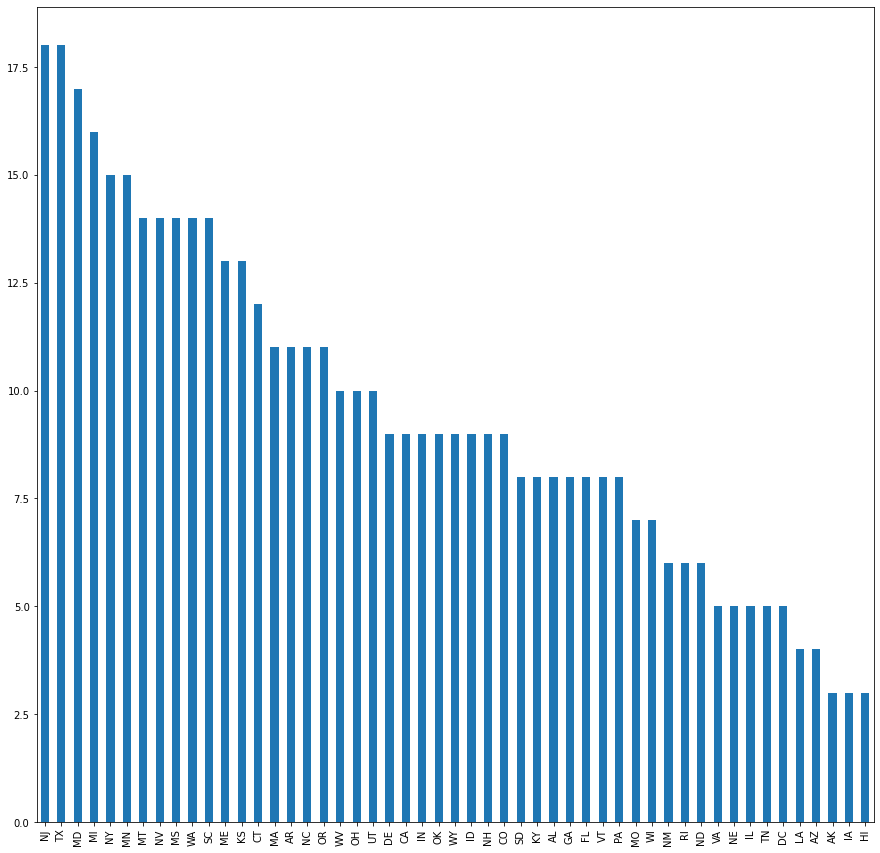

In [27]:
#Let's check where the churns are occuring 
churned['State'].value_counts().plot.bar(figsize=(15,15))

In [29]:
#Let's check this on a per state basis 
per_churn_state = churned['State'].value_counts()/churn['State'].value_counts()
per_churn_state

AK    0.057692
AL    0.100000
AR    0.200000
AZ    0.062500
CA    0.264706
CO    0.136364
CT    0.162162
DC    0.092593
DE    0.147541
FL    0.126984
GA    0.148148
HI    0.056604
IA    0.068182
ID    0.123288
IL    0.086207
IN    0.126761
KS    0.185714
KY    0.135593
LA    0.078431
MA    0.169231
MD    0.242857
ME    0.209677
MI    0.219178
MN    0.178571
MO    0.111111
MS    0.215385
MT    0.205882
NC    0.161765
ND    0.096774
NE    0.081967
NH    0.160714
NJ    0.264706
NM    0.096774
NV    0.212121
NY    0.180723
OH    0.128205
OK    0.147541
OR    0.141026
PA    0.177778
RI    0.092308
SC    0.233333
SD    0.133333
TN    0.094340
TX    0.250000
UT    0.138889
VA    0.064935
VT    0.109589
WA    0.212121
WI    0.089744
WV    0.094340
WY    0.116883
Name: State, dtype: float64

<AxesSubplot:>

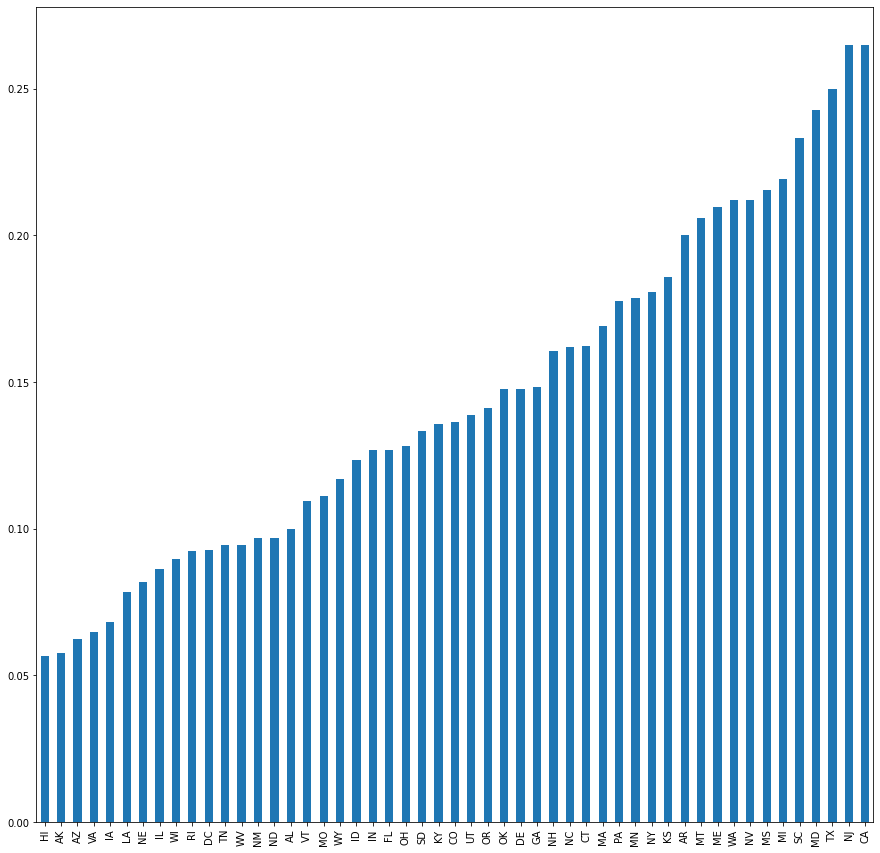

In [30]:
#Let's Visualize with a bar chart 
per_churn_state.sort_values().plot.bar(figsize=(15,15))

# Preprocessing for Training

In [31]:
na_values = [' ','NaN','N/A']
churn = pd.read_csv('https://raw.githubusercontent.com/LGKerby/Python/master/churn.txt',na_values=na_values)
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [32]:
#Drop Area Code, Phone and Churn?
features= churn.drop(['Area Code', 'Phone', 'Churn?'], axis=1)
features.head()

,State,Account Length,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [33]:
#Categorical Features (This will create ALOT of dummy variables )
features = pd.get_dummies(features)
features.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,0,1,1,0


In [34]:
features.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'State_AK', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
       'Int'l Plan_no', 'Int'l Plan_yes', 'VMail Plan_no', 'VMail Plan_yes'],
      dt

In [35]:
target = churn['Churn?']
target.head()

0    False.
1    False.
2    False.
3    False.
4    False.
Name: Churn?, dtype: object

Our model is to help classify churn and none churn customers. So what is the target column going to be? 

In [36]:
#Split up the data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=1/5)

In [38]:
y_train.shape

(2666,)

# Train the Decision Tree Model 

In [39]:
from sklearn.tree import DecisionTreeClassifier
class_tree = DecisionTreeClassifier()
class_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
#Check how our model performs 
class_tree.score(X_train, y_train)

1.0

In [41]:
class_tree.score(X_test, y_test)

0.9025487256371814

In [42]:
class_tree.get_depth()

21

In [43]:
#Plot out the tree
from sklearn import tree 
plt.figure(figsize=(250,250))
tree.plot_tree(class_tree, feature_names= X_train.columns, class_names=['Stay', 'Churn'])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [44]:
#We can prune the tree to try and reduce the overfit 
class_tree_pruned = DecisionTreeClassifier(max_depth=4)
class_tree_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [46]:
#check our scores 
print(class_tree_pruned.score(X_train, y_train))
print(class_tree_pruned.score(X_test, y_test))

0.9321080270067517
0.9010494752623688


In [47]:
y_pred = class_tree.predict(X_test)

In [49]:
from sklearn.metrics import  precision_score, recall_score
print(precision_score(y_test, y_pred, pos_label='True.'))
print(recall_score(y_test, y_pred, pos_label= 'True.'))

0.7047619047619048
0.6851851851851852


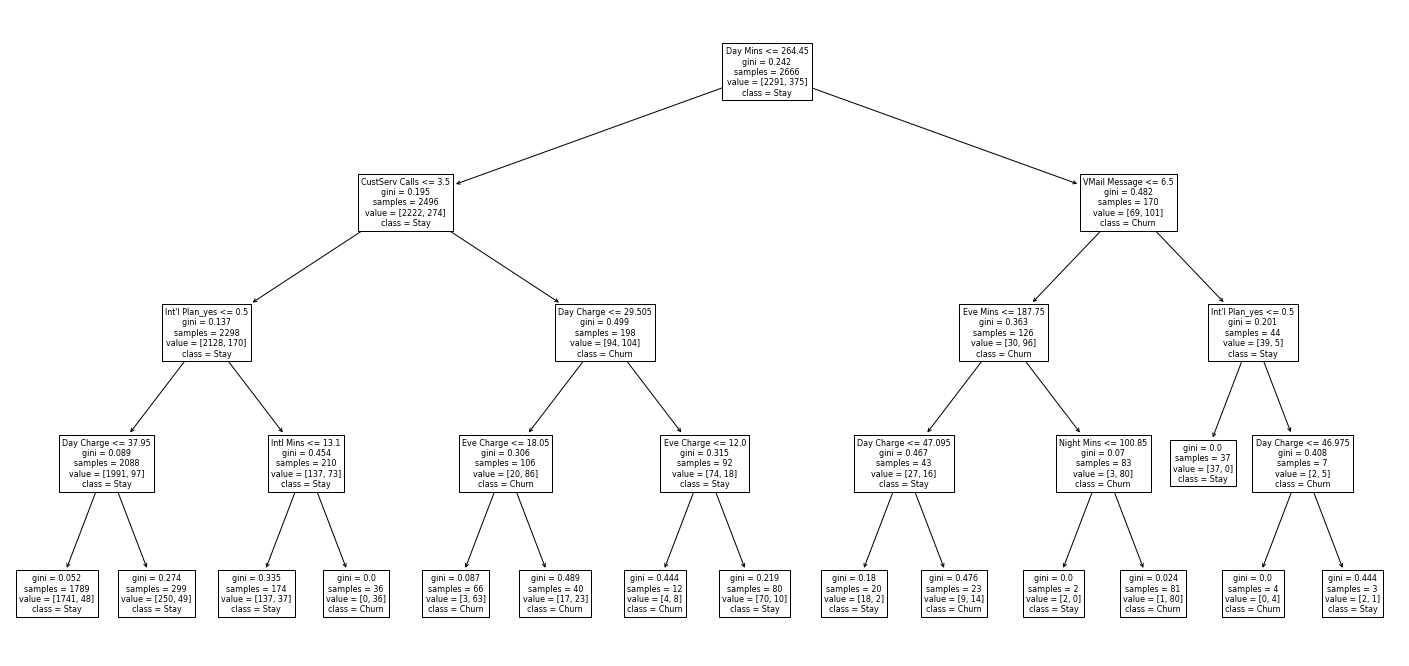

In [50]:
#Plot out the tree
from sklearn import tree 
plt.figure(figsize=(25,12))
tree.plot_tree(class_tree_pruned, feature_names= X_train.columns, class_names=['Stay', 'Churn'])
plt.show()

Sklearn has an interesting method called feature_importances_, (The gini importance)

In [51]:
#Return the importance of each feature 
class_tree_pruned.feature_importances_

array([0.        , 0.07947306, 0.21650781, 0.        , 0.15663038,
       0.05751838, 0.        , 0.03855819, 0.01104035, 0.        ,
       0.        , 0.1072287 , 0.        , 0.        , 0.21527293,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.11777019, 0.        , 0.        ])

In [52]:
importances = pd.Series(data=class_tree_pruned.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False)#Sort by most important feature 

Day Mins          0.216508
CustServ Calls    0.215273
Day Charge        0.156630
Int'l Plan_yes    0.117770
Intl Mins         0.107229
                    ...   
State_KY          0.000000
State_LA          0.000000
State_MA          0.000000
State_ME          0.000000
VMail Plan_yes    0.000000
Length: 70, dtype: float64